# WHO Suicide Statistics

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [53]:
df = pd.read_csv('/home/ml-engineer/Documents/Dataset/who-suicide-statistics/who_suicide_statistics.csv')

In [54]:
df.shape

(43776, 6)

In [55]:
df.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [60]:
df.year = df.year.apply(lambda x: str(x) + "-01-01")

In [61]:
df.year = pd.to_datetime(df.year, format = '%Y/%m/%d')

In [62]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985-01-01,female,15-24 years,NaN,277900.0
1,Albania,1985-01-01,female,25-34 years,NaN,246800.0
2,Albania,1985-01-01,female,35-54 years,NaN,267500.0
3,Albania,1985-01-01,female,5-14 years,NaN,298300.0
4,Albania,1985-01-01,female,55-74 years,NaN,138700.0


In [63]:
df.describe()

,suicides_no,population
count,41520.000000,3.831600e+04
mean,193.315390,1.664091e+06
std,800.589926,3.647231e+06
min,0.000000,2.590000e+02
25%,1.000000,8.511275e+04
50%,14.000000,3.806550e+05
75%,91.000000,1.305698e+06
max,22338.000000,4.380521e+07


How many missing values over category

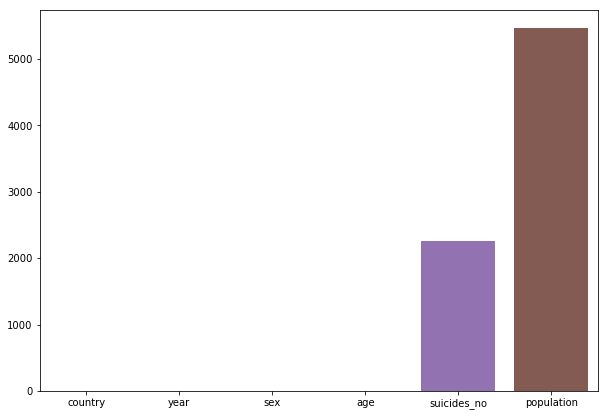

In [107]:
plt.figure(figsize=(10, 7))
sns.barplot(x = df.isnull().sum().index, y = df.isnull().sum())

How many missing values over time

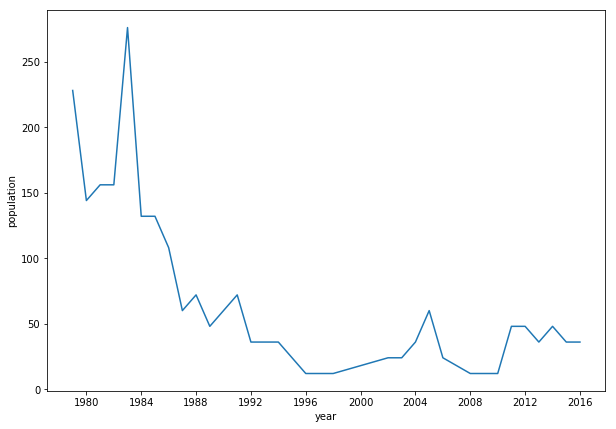

In [108]:
df_null = df[df.suicides_no.isnull()]
plt.figure(figsize=(10, 7))
sns.lineplot(x = df_null.groupby('year')['population'].count().index, y = df_null.groupby('year')['population'].count())

Records each year

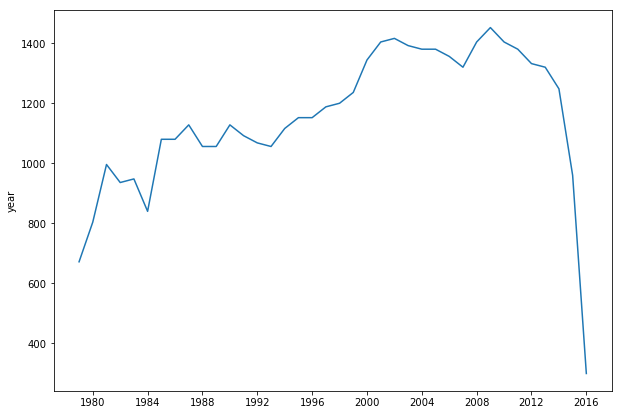

In [111]:
plt.figure(figsize=(10, 7))
year_count = df.year.value_counts()
sns.lineplot(x = year_count.sort_index().index, y = year_count.sort_index())

Which counties that data is always available

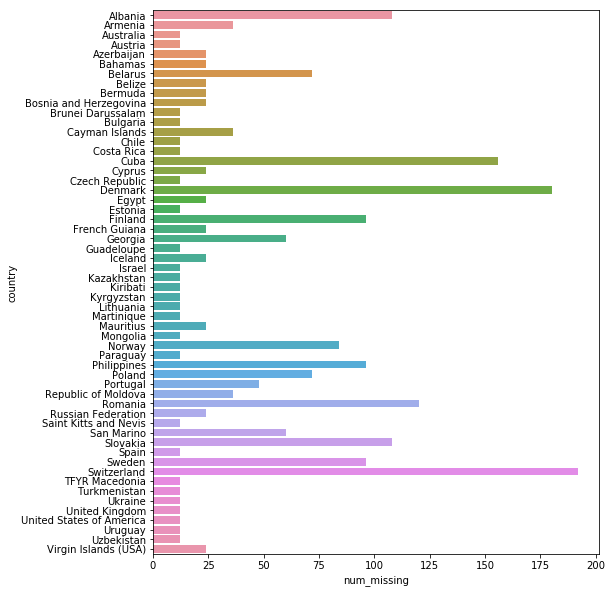

In [146]:
plt.figure(figsize=(8, 10))
df_suicide_null = df[df.suicides_no.isnull()]
df_suicide_groupby = df_suicide_null.groupby('country')['year'].count()
df_suicide_groupby = df_suicide_groupby.reset_index()
df_suicide_groupby.columns = ["country", "num_missing"]
sns.barplot(y = 'country' , x = 'num_missing', data = df_suicide_groupby)

## Exploratory

Which Gender do suicide the most

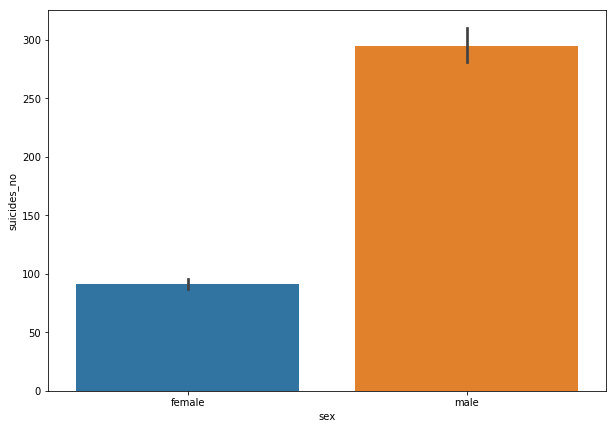

In [105]:
plt.figure(figsize=(10, 7))
sns.barplot(x = 'sex', y = 'suicides_no', data = df)

Number of suicides over the year

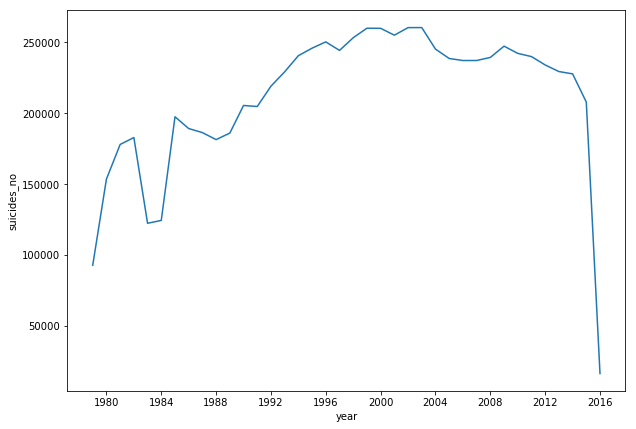

In [106]:
plt.figure(figsize=(10, 7))
df_year_over_suicides = df.groupby('year')['suicides_no'].sum()
df_year_over_suicides = df_year_over_suicides.reset_index()
sns.lineplot(x = 'year', y = 'suicides_no', data = df_year_over_suicides)

In [151]:
df_clean_from_na = df[~df.suicides_no.isnull() & ~df.population.isnull()]

In [154]:
df_clean_from_na

,country,year,sex,age,suicides_no,population
24,Albania,1987-01-01,female,15-24 years,14.0,289700.0
25,Albania,1987-01-01,female,25-34 years,4.0,257200.0
26,Albania,1987-01-01,female,35-54 years,6.0,278800.0
27,Albania,1987-01-01,female,5-14 years,0.0,311000.0
28,Albania,1987-01-01,female,55-74 years,0.0,144600.0
29,Albania,1987-01-01,female,75+ years,1.0,35600.0
30,Albania,1987-01-01,male,15-24 years,21.0,312900.0
31,Albania,1987-01-01,male,25-34 years,9.0,274300.0
32,Albania,1987-01-01,male,35-54 years,16.0,308000.0
33,Albania,1987-01-01,male,5-14 years,0.0,338200.0
